In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing data from CSVs

In [3]:
df_s = pd.read_csv("C:/Users/ABHINI/Desktop/Capstone/Data/VideoStarted.csv")
df_d = pd.read_csv("C:/Users/ABHINI/Desktop/Capstone/Data/VideoDetails.csv")
df_utm = pd.read_csv("C:/Users/ABHINI/Desktop/Capstone/Data/UTMVisited.csv")
df_reg = pd.read_csv("C:/Users/ABHINI/Desktop/Capstone/Data/Registration.csv")
df_u = pd.read_csv("C:/Users/ABHINI/Desktop/Capstone/Data/AppUninstalled.csv")
df_l = pd.read_csv("C:/Users/ABHINI/Desktop/Capstone/Data/AppLaunched.csv")

Converting Date column in Datetime format

In [4]:
df_s["Date"] = df_s["Date"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_d["Date"] = df_d["Date"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_utm["Date"] = df_utm["Date"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_reg["Date"] = df_reg["Date"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_u["Date"] = df_u["Date"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_l["Date"] = df_l["Date"].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

## Exploratory Data Analysis

### Content Distribution across Platform

In [5]:
df_s_d_c = pd.concat([df_s[["Genre","Category","ProgramType","VideoId"]],df_d[["Genre","Category","ProgramType","VideoId"]]],0)
df_s_d_c["ProgramType"]= df_s_d_c["ProgramType"].str.strip()
df_s_d_c = df_s_d_c.drop_duplicates()
df_s_d_c["ProgramType"].value_counts()

TV Shows    6267
Movies      1043
Channels     295
               8
Name: ProgramType, dtype: int64

([<matplotlib.patches.Wedge at 0x1fdf0f32f60>,
 [Text(-0.934634,0.580051,'TV Shows'),
  Text(0.854999,-0.692082,'Movies'),
  Text(1.09095,-0.140784,'Channels'),
  Text(1.09999,-0.00363123,'')])

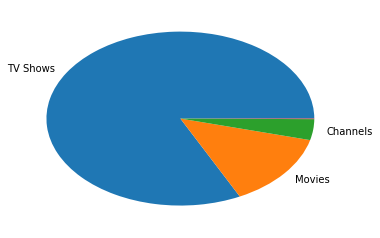

In [6]:
plt.pie(df_s_d_c["ProgramType"].value_counts().values, labels=df_s_d_c["ProgramType"].value_counts().index)

In [7]:
f=df_s_d_c.groupby(["ProgramType","Genre"]).size()
f = pd.DataFrame(f)
f = f.reset_index()
f.columns = ["ProgramType", "Genre", "Count"]
f = f.sort_values(by = "Count",ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

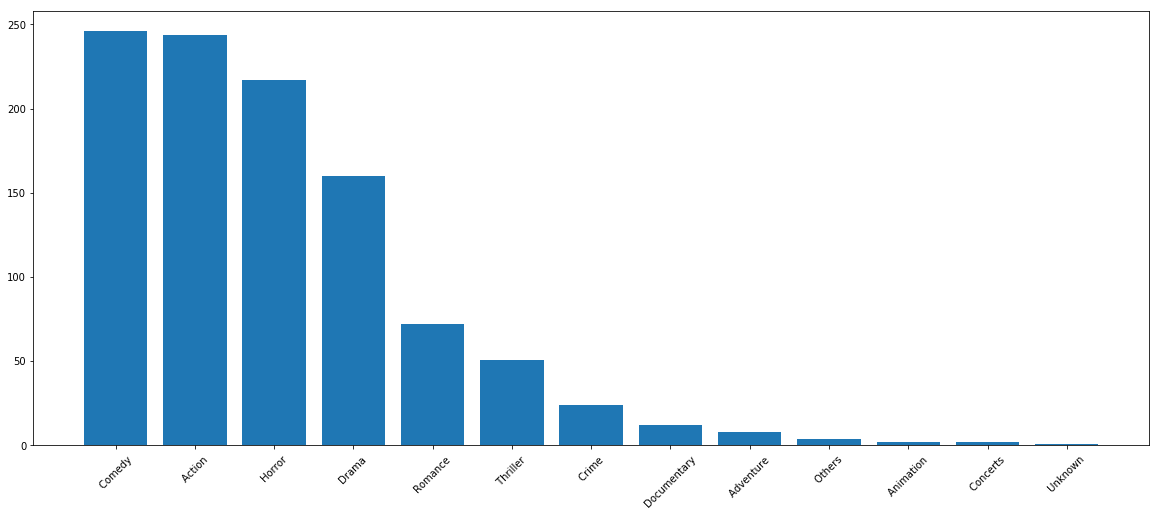

In [8]:
plt.figure(figsize = (20,8))
plt.bar(f[f["ProgramType"]=="Movies"]["Genre"],f[f["ProgramType"]=="Movies"]["Count"])
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

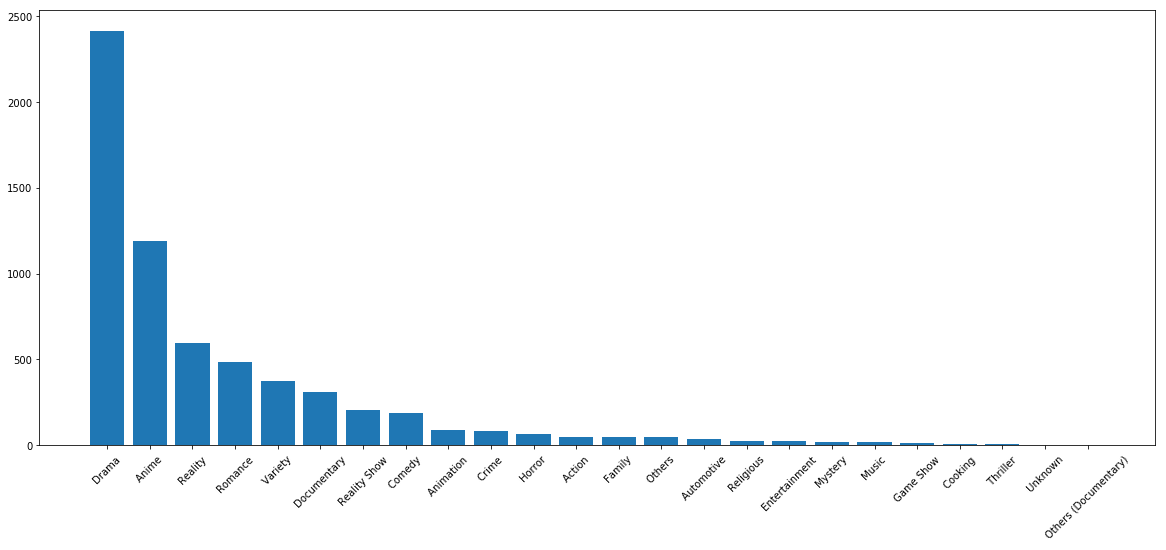

In [9]:
plt.figure(figsize = (20,8))
plt.bar(f[f["ProgramType"]=="TV Shows"]["Genre"],f[f["ProgramType"]=="TV Shows"]["Count"])
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 <a list of 40 Text xticklabel objects>)

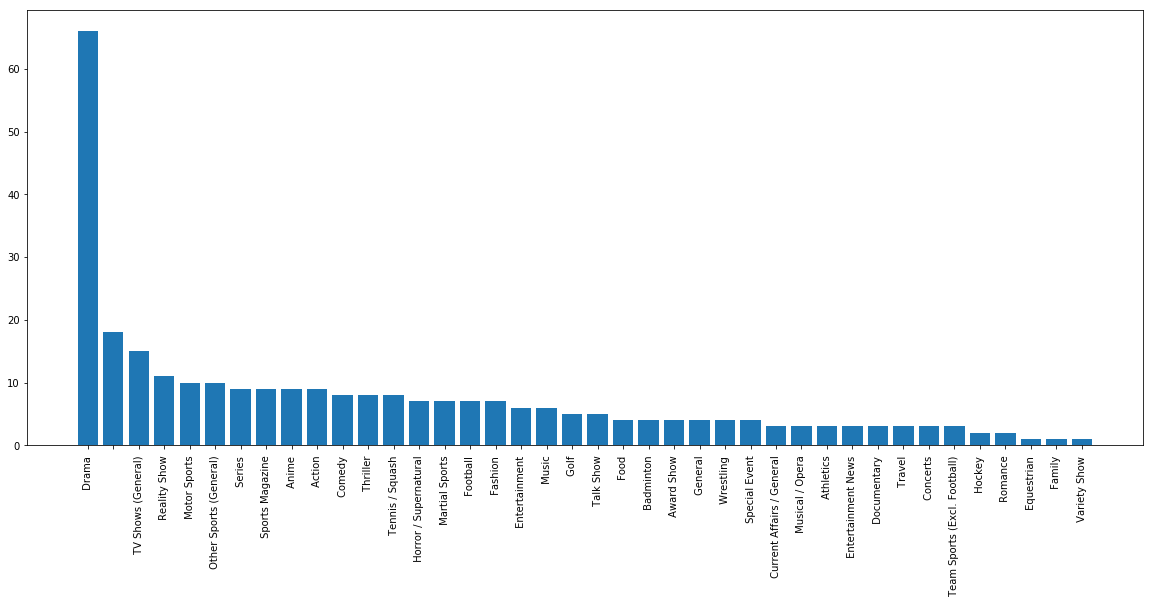

In [10]:
plt.figure(figsize = (20,8))
plt.bar(f[f["ProgramType"]=="Channels"]["Genre"],f[f["ProgramType"]=="Channels"]["Count"])
plt.xticks(rotation=90)

### Modelling

Train set consists of data till 10-06-2017 and test set contains the data for 11-06-2017 and 12-06-2017

In [11]:
df_s_train = df_s[df_s["Date"]<pd.to_datetime("2017-06-11")]
df_d_train = df_d[df_d["Date"]<pd.to_datetime("2017-06-11")]
df_utm_train = df_utm[df_utm["Date"]<pd.to_datetime("2017-06-11")]
df_reg_train = df_reg[df_reg["Date"]<pd.to_datetime("2017-06-11")]
df_u_train = df_u[df_u["Date"]<pd.to_datetime("2017-06-11")]
df_l_train = df_l[df_l["Date"]<pd.to_datetime("2017-06-11")]

Making user specific matrix with all the features of user. Users in VideoDetails and VideoStarted CSV is only considered.

In [12]:
user_s = pd.DataFrame(df_s_train.groupby('UserId').size()).reset_index()
user_s.columns =["UserId", "TotalStarted"]
user_s = user_s.sort_values(["TotalStarted"], ascending=False)
user_s.head()

,UserId,TotalStarted
53743,552a06b0d76834d4fad8d4883769fd7b,1375
11874,12e4dc8067ca6ef33c0a1ddb54a0d514,1282
18802,1dd0f1306405d9560dd100982c04556d,1257
153948,f3c35aafb42cc3ee09fb8f10572d5ee9,1234
8187,0ceda9d5fc9679bab96b91b7a7380c13,1088


In [13]:
user_s["TotalStarted"].describe()

count    161654.000000
mean         10.778063
std          25.312984
min           1.000000
25%           2.000000
50%           4.000000
75%          10.000000
max        1375.000000
Name: TotalStarted, dtype: float64

The description above shows that the average Total number of videos watched per user is very less **~10 videos/user** in the span of 6 months

In [14]:
user_d = pd.DataFrame(df_d_train.groupby('UserId').size()).reset_index()
user_d.columns =["UserId", "TotalDetails"]
user_d = user_d.sort_values(["TotalDetails"], ascending=False)
user_d.head()

,UserId,TotalDetails
12588,0ceda9d5fc9679bab96b91b7a7380c13,2006
186473,c0c01bf234c84f928218ca89f860f183,1876
21956,16c660a8b759200cb871879d044ce3dd,1374
40758,2a32428a7e58778f6d0e2d5747e63415,1270
79444,51fe655e1c4ca4472c2b64c1e5c65e95,1234


In [15]:
user_s_d = pd.merge(user_d,user_s, on = "UserId", how = 'outer')
user_s_d.head()

,UserId,TotalDetails,TotalStarted
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0


In [16]:
user_s_d.shape[0]

259500

The user_s_d dataframe contains all the unique users who have watched the videos or at least seen their details on the platform. There are **2,59,500** such users.

In [17]:
user_s_d["TotalDetails"] = user_s_d["TotalDetails"].fillna(0)
user_s_d["TotalStarted"] = user_s_d["TotalStarted"].fillna(0)

Now finding out the Country of the user.

In [18]:
user_country = pd.concat([df_s[["UserId", "Country"]], df_d[["UserId", "Country"]]],0)
user_country = user_country.drop_duplicates()
user_country["Country"].value_counts()

1      178858
40      67510
255     16168
14        683
2         242
30        127
0          70
47         34
12         18
15         13
46          9
7           9
10          8
5           6
23          4
29          3
54          3
24          2
16          2
11          2
73          2
159         1
57          1
36          1
74          1
39          1
9           1
42          1
86          1
88          1
65          1
Name: Country, dtype: int64

As seen from the abovedistribution, there are 31 countries but most of the users are from Country 1, 40 and 255. Hence for the simplicity, lets combine rest of the countries and call them "Other" (Assign them number 1000)

In [19]:
user_country.loc[(user_country["Country"]!=1)&(user_country["Country"]!=40)& (user_country["Country"]!=255),"Country"] = 1000
user_country["Country"].value_counts()

1       178858
40       67510
255      16168
1000      1247
Name: Country, dtype: int64

In [20]:
user_s_d = pd.merge(user_s_d, user_country, on = "UserId", how = "left")
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40


Next we find out How many days ago the user last started a video. If the user has never started a video, 365 is assigned.

In [21]:
last_watched = df_s_train[["UserId", "Date"]].groupby("UserId").max()
last_watched = last_watched.reset_index()
user_s_d = pd.merge(user_s_d, last_watched, on = "UserId", how = "left")
user_s_d["LastStartedDayAgo"] = (pd.to_datetime("2017-06-10")- user_s_d["Date"]).dt.days
user_s_d["LastStartedDayAgo"] = user_s_d["LastStartedDayAgo"].fillna(365)
user_s_d = user_s_d.drop("Date",1)
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0


Next we find the monthly video Started frquency. To calculate that, we use the following logic:
    1. Find out total number of video watched for each month/ user
    2. Weight is assigned to each month, with highest weightage to the most recent month and least weightage to the least recent month.
    3. Multiply the value counted in step 1 with the respective weights
    4. Add all values per user.
    5. Devide by the number of months the user has watched the videos.

In [22]:
df_s_train["Month"] = df_s_train["Date"].dt.month
monthly_started_freq = pd.DataFrame(df_s_train[["UserId","Month"]].groupby(["UserId","Month"]).size())
monthly_started_freq = monthly_started_freq.reset_index()
monthly_started_freq.columns = ["UserId", "Month", "Frequency"]
monthly_started_freq.head()

C:\Users\ABHINI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,UserId,Month,Frequency
0,0000146e97c32d369268e5ba5f4b907c,2,1
1,00004010d92c2f13b824237bc323d58b,4,2
2,000076c7bbdf7e4568777134cc4bec56,6,6
3,0000e560394fce891dcf80218793d181,3,3
4,000111507a214a26efe459cb2807cd78,5,1


In [23]:
w = {6:0.4, 5:0.3, 4:0.1, 3:0.1, 2:0.05, 1:0.05}
monthly_started_freq["Weight"] = monthly_started_freq["Month"].map(w)
monthly_started_freq["MonthlyFreq"] = monthly_started_freq["Frequency"]* monthly_started_freq["Weight"]
monthly_started_freq["Divisor"] = np.ones(monthly_started_freq.shape[0])
monthly_started_freq.head()

,UserId,Month,Frequency,Weight,MonthlyFreq,Divisor
0,0000146e97c32d369268e5ba5f4b907c,2,1,0.05,0.05,1.0
1,00004010d92c2f13b824237bc323d58b,4,2,0.10,0.20,1.0
2,000076c7bbdf7e4568777134cc4bec56,6,6,0.40,2.40,1.0
3,0000e560394fce891dcf80218793d181,3,3,0.10,0.30,1.0
4,000111507a214a26efe459cb2807cd78,5,1,0.30,0.30,1.0


In [24]:
freq = monthly_started_freq[["UserId","MonthlyFreq", "Divisor"]].groupby("UserId").sum()
freq["MonthlyStartedFreq"] = freq["MonthlyFreq"]/freq["Divisor"]
freq = freq.reset_index()
freq.head()

,UserId,MonthlyFreq,Divisor,MonthlyStartedFreq
0,0000146e97c32d369268e5ba5f4b907c,0.05,1.0,0.05
1,00004010d92c2f13b824237bc323d58b,0.20,1.0,0.20
2,000076c7bbdf7e4568777134cc4bec56,2.40,1.0,2.40
3,0000e560394fce891dcf80218793d181,0.30,1.0,0.30
4,000111507a214a26efe459cb2807cd78,1.10,2.0,0.55


In [25]:
user_s_d = pd.merge(user_s_d, freq[["UserId", "MonthlyStartedFreq"]], on = "UserId", how = "left")
user_s_d["MonthlyStartedFreq"]  = user_s_d["MonthlyStartedFreq"].fillna(0)
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667


Lets find out the total UTM clicks made by the users.

In [26]:
utm_clicks = pd.DataFrame(df_utm_train[["UserId","Country"]].groupby("UserId").size())
utm_clicks = utm_clicks.reset_index()
utm_clicks.columns = ["UserId", "TotalUTMClicks"]
utm_clicks.head()

,UserId,TotalUTMClicks
0,0000146e97c32d369268e5ba5f4b907c,4
1,00001e3213a2159ed06f1db689c54fbb,1
2,00004010d92c2f13b824237bc323d58b,2
3,00004dd911aafdc3f3cd64a490bd56f1,1
4,000076c7bbdf7e4568777134cc4bec56,1


In [27]:
user_s_d = pd.merge(user_s_d,utm_clicks, on = "UserId", how = "left")
user_s_d["TotalUTMClicks"] = user_s_d["TotalUTMClicks"].fillna(0)
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333,8.0
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000,29.0
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333,7.0
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000,20.0
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667,15.0


In [28]:
user_reg = pd.DataFrame(df_reg_train[["UserId", "Status"]].groupby("UserId").last())
user_reg = user_reg.reset_index()
user_reg.loc[user_reg["Status"]=="Complete", "Status"] = "Completed"
user_reg.columns = ["UserId", "LatestRegistrationStatus"]
user_reg.head()

,UserId,LatestRegistrationStatus
0,0000146e97c32d369268e5ba5f4b907c,Completed
1,00001e3213a2159ed06f1db689c54fbb,Completed
2,00004010d92c2f13b824237bc323d58b,Completed
3,000076c7bbdf7e4568777134cc4bec56,Completed
4,0000e560394fce891dcf80218793d181,Completed


In [29]:
user_s_d = pd.merge(user_s_d,user_reg, on = "UserId", how = "left")
user_s_d["LatestRegistrationStatus"] = user_s_d["LatestRegistrationStatus"].fillna("Unknown")
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LatestRegistrationStatus
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333,8.0,Completed
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000,29.0,Completed
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333,7.0,Completed
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000,20.0,Unknown
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667,15.0,Completed


In [30]:
user_r_u = pd.DataFrame(df_u_train[["UserId","Date"]].groupby("UserId").last())
user_r_u = user_r_u.reset_index()
user_r_u.head()

,UserId,Date
0,0000146e97c32d369268e5ba5f4b907c,2017-03-16
1,0000193a728fd00b6cff91b8840bbf8d,2017-02-09
2,00001e3213a2159ed06f1db689c54fbb,2017-03-08
3,00004010d92c2f13b824237bc323d58b,2017-05-02
4,00004dd911aafdc3f3cd64a490bd56f1,2017-05-07


In [31]:
user_l = pd.DataFrame(df_l_train[["UserId","Date"]].groupby("UserId").last())
user_l = user_l.reset_index()
user_l.head()

,UserId,Date
0,0000146e97c32d369268e5ba5f4b907c,2017-03-13
1,0000193a728fd00b6cff91b8840bbf8d,2017-02-08
2,00001e3213a2159ed06f1db689c54fbb,2017-02-19
3,00004010d92c2f13b824237bc323d58b,2017-04-30
4,00004dd911aafdc3f3cd64a490bd56f1,2017-05-07


In [32]:
user_l.columns = ["UserId","LastAppLaunch"]
user_r_u = pd.merge(user_r_u, user_l, on = "UserId", how = "left")
user_r_u["check"] = user_r_u["Date"]<user_r_u["LastAppLaunch"]
user_r_u.head()

,UserId,Date,LastAppLaunch,check
0,0000146e97c32d369268e5ba5f4b907c,2017-03-16,2017-03-13,False
1,0000193a728fd00b6cff91b8840bbf8d,2017-02-09,2017-02-08,False
2,00001e3213a2159ed06f1db689c54fbb,2017-03-08,2017-02-19,False
3,00004010d92c2f13b824237bc323d58b,2017-05-02,2017-04-30,False
4,00004dd911aafdc3f3cd64a490bd56f1,2017-05-07,2017-05-07,False


In [33]:
user_r_u["Uninstalled"] = np.ones(user_r_u.shape[0])
user_r_u.loc[user_r_u["check"],'Uninstalled']=0
user_r_u["Uninstalled"].value_counts()

1.0    298182
0.0      5219
Name: Uninstalled, dtype: int64

In [34]:
user_s_d = pd.merge(user_s_d, user_r_u[["UserId","Uninstalled"]], on = "UserId", how = "left")
user_s_d["Uninstalled"] = user_s_d["Uninstalled"].fillna(0)
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LatestRegistrationStatus,Uninstalled
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333,8.0,Completed,0.0
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000,29.0,Completed,0.0
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333,7.0,Completed,0.0
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000,20.0,Unknown,0.0
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667,15.0,Completed,0.0


In [35]:
user_s_d["Uninstalled"].value_counts()

1.0    170477
0.0     89023
Name: Uninstalled, dtype: int64

In [36]:
df_s_d = pd.concat([df_s_train[["UserId", "Date", "OS", "Device"]], df_d_train[["UserId", "Date", "OS","Device"]]],0)
df_s_d = df_s_d.drop_duplicates()
user_x = df_s_d.groupby("UserId").last()
user_x = user_x.reset_index()
user_x.head()

,UserId,Date,OS,Device
0,0000146e97c32d369268e5ba5f4b907c,2017-02-28,1,1
1,00001e3213a2159ed06f1db689c54fbb,2017-02-19,1,1
2,00004010d92c2f13b824237bc323d58b,2017-04-30,1,2
3,000076c7bbdf7e4568777134cc4bec56,2017-06-10,2,1
4,0000e560394fce891dcf80218793d181,2017-03-26,1,1


In [37]:
user_s_d = pd.merge(user_s_d,user_x[["UserId","OS","Device"]], on = "UserId", how = "left")
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LatestRegistrationStatus,Uninstalled,OS,Device
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333,8.0,Completed,0.0,2,2
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000,29.0,Completed,0.0,1,1
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333,7.0,Completed,0.0,2,1
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000,20.0,Unknown,0.0,2,1
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667,15.0,Completed,0.0,2,1


In [38]:
last_launched = df_l_train[["UserId", "Date"]].groupby("UserId").max()
last_launched = last_launched.reset_index()
user_s_d = pd.merge(user_s_d, last_launched, on = "UserId", how = "left")
user_s_d["LastLaunchedDayAgo"] = (pd.to_datetime("2017-06-10")- user_s_d["Date"]).dt.days
user_s_d["LastLaunchedDayAgo"] = user_s_d["LastLaunchedDayAgo"].fillna(365)
user_s_d = user_s_d.drop("Date",1)
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LatestRegistrationStatus,Uninstalled,OS,Device,LastLaunchedDayAgo
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333,8.0,Completed,0.0,2,2,0.0
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000,29.0,Completed,0.0,1,1,4.0
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333,7.0,Completed,0.0,2,1,3.0
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000,20.0,Unknown,0.0,2,1,5.0
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667,15.0,Completed,0.0,2,1,4.0


(array([12894.,  7312.,  6699.,  5404.,  4572.,  4567.,  4719.,  4071.,
         3717.,  3942.,  6384.,  4655.,  4628.,  4491.,  3980.,  5237.,
         3686.,  3230.,  3425.,  3452.,  4295.,  2207.,  2084.,  1911.,
         2641.,  1758.,  1712.,  1717.,  1623.,  1949.,  2152.,  1705.,
         1330.,  1493.,  1478.,  1290.,  1410.,  1526.,  1886.,  1837.,
         3204.,  2157.,  2037.,  1675.,  2674.,  2242.,  1891.,  1977.,
         1719.,  3009.]),
 array([  0. ,   3.1,   6.2,   9.3,  12.4,  15.5,  18.6,  21.7,  24.8,
         27.9,  31. ,  34.1,  37.2,  40.3,  43.4,  46.5,  49.6,  52.7,
         55.8,  58.9,  62. ,  65.1,  68.2,  71.3,  74.4,  77.5,  80.6,
         83.7,  86.8,  89.9,  93. ,  96.1,  99.2, 102.3, 105.4, 108.5,
        111.6, 114.7, 117.8, 120.9, 124. , 127.1, 130.2, 133.3, 136.4,
        139.5, 142.6, 145.7, 148.8, 151.9, 155. ]),
 <a list of 50 Patch objects>)

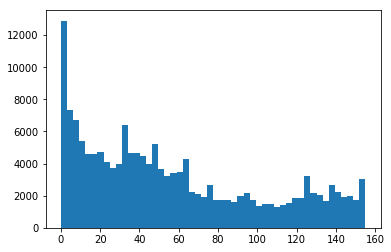

In [39]:
plt.hist(user_s_d[user_s_d["LastStartedDayAgo"]!=365]['LastStartedDayAgo'], bins = 50)

Text(0,0.5,'No. of Users Uninstalling')

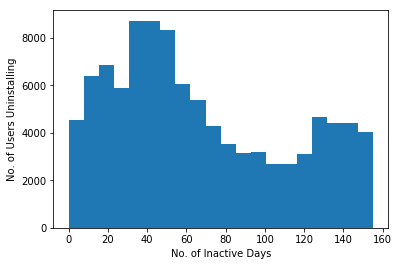

In [41]:
plt.hist(user_s_d[(user_s_d["Uninstalled"]==1)&(user_s_d["LastStartedDayAgo"]!=365)]['LastStartedDayAgo'], bins = 20)
plt.xlabel("No. of Inactive Days")
plt.ylabel("No. of Users Uninstalling")

Most of the users Uninstall the App after 30-50 days of inactivity. i.e. after 30-50 days of not starting any video.

(array([25812., 13336.,  9172.,  7400.,  6847.,  6516.,  6688.,  5953.,
         5640.,  5735.,  8218.,  6466.,  6135.,  5870.,  5969.,  6391.,
         5196.,  4789.,  4877.,  4690.,  5580.,  3390.,  3233.,  2874.,
         3697.,  2940.,  3155.,  3291.,  3261.,  3684.,  4042.,  3090.,
         2563.,  2969.,  3096.,  2430.,  2663.,  2906.,  3456.,  3423.,
         5311.,  3881.,  3977.,  3969.,  4596.,  4529.,  3990.,  4127.,
         3284.,  4381.]),
 array([  0. ,   3.1,   6.2,   9.3,  12.4,  15.5,  18.6,  21.7,  24.8,
         27.9,  31. ,  34.1,  37.2,  40.3,  43.4,  46.5,  49.6,  52.7,
         55.8,  58.9,  62. ,  65.1,  68.2,  71.3,  74.4,  77.5,  80.6,
         83.7,  86.8,  89.9,  93. ,  96.1,  99.2, 102.3, 105.4, 108.5,
        111.6, 114.7, 117.8, 120.9, 124. , 127.1, 130.2, 133.3, 136.4,
        139.5, 142.6, 145.7, 148.8, 151.9, 155. ]),
 <a list of 50 Patch objects>)

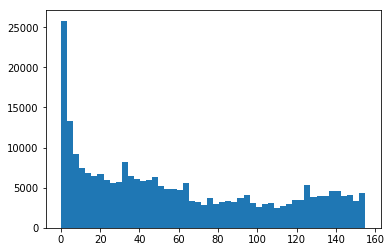

In [42]:
plt.hist(user_s_d[user_s_d["LastLaunchedDayAgo"]!=365]['LastLaunchedDayAgo'], bins = 50)

(array([3794., 4952., 4198., 4015., 3999., 4140., 4393., 4215., 4069.,
        4253., 6322., 5091., 4928., 4749., 4958., 5213., 4336., 3893.,
        3970., 3691., 4417., 2661., 2477., 2276., 2854., 2307., 2249.,
        2152., 2150., 2457., 2651., 2072., 1723., 1907., 1964., 1583.,
        1827., 2001., 2383., 2369., 3643., 3073., 3498., 3457., 4051.,
        3989., 3395., 3456., 2675., 3572.]),
 array([  0. ,   3.1,   6.2,   9.3,  12.4,  15.5,  18.6,  21.7,  24.8,
         27.9,  31. ,  34.1,  37.2,  40.3,  43.4,  46.5,  49.6,  52.7,
         55.8,  58.9,  62. ,  65.1,  68.2,  71.3,  74.4,  77.5,  80.6,
         83.7,  86.8,  89.9,  93. ,  96.1,  99.2, 102.3, 105.4, 108.5,
        111.6, 114.7, 117.8, 120.9, 124. , 127.1, 130.2, 133.3, 136.4,
        139.5, 142.6, 145.7, 148.8, 151.9, 155. ]),
 <a list of 50 Patch objects>)

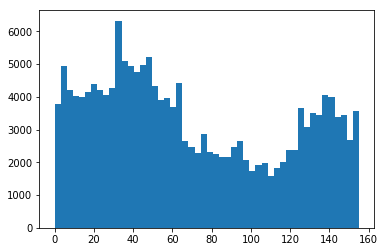

In [43]:
plt.hist(user_s_d[(user_s_d["Uninstalled"]==1)&(user_s_d["LastLaunchedDayAgo"]!=365)]['LastLaunchedDayAgo'], bins = 50)

([<matplotlib.patches.Wedge at 0x1fdcbe78c50>,
 [Text(-0.538462,0.959197,'Completed'),
  Text(0.0573969,-1.0985,'Unknown'),
  Text(0.985987,-0.487679,'Not Completed')])

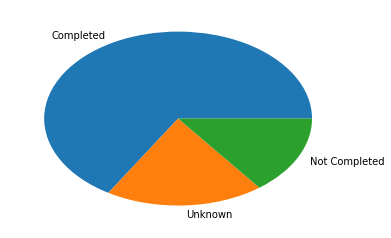

In [44]:
plt.pie(user_s_d["LatestRegistrationStatus"].value_counts().values, labels=user_s_d["LatestRegistrationStatus"].value_counts().index)

In [45]:
user_s_d.sort_values(by = "TotalUTMClicks", ascending=False).head(10)

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LatestRegistrationStatus,Uninstalled,OS,Device,LastLaunchedDayAgo
208902,e46a7f614781f07f086b92380c8770f1,1.0,1.0,255,140.0,0.05,1440.0,Completed,1.0,1,1,140.0
60567,b909cf4013adcb6bf018add277c269dd,11.0,2.0,1,142.0,0.10,1388.0,Completed,1.0,1,1,140.0
112401,2fb81f1711f0de4c921d2f387bef1ab4,5.0,1.0,1,20.0,0.30,1329.0,Completed,1.0,1,1,14.0
165764,625a4c8425d4a13af9e0ba2817ec7483,2.0,0.0,1,365.0,0.00,1302.0,Unknown,1.0,1,1,118.0
156507,00d39f8965fb54ed2b45a6e991e6e767,3.0,3.0,1,153.0,0.15,1185.0,Completed,1.0,1,1,152.0
110486,1e2f6f34c36e2d2022c55c823369568d,5.0,0.0,1,365.0,0.00,1164.0,Completed,1.0,1,2,120.0
176030,2b89b10992a2ececab0649782222aec2,2.0,0.0,40,365.0,0.00,1027.0,Not Completed,1.0,1,1,138.0
91281,65d9ba2c68ba7a25b4f00e9ac59b33d9,6.0,2.0,255,139.0,0.10,959.0,Completed,1.0,1,1,137.0
75887,e2719826fe457e2ae60589af34e05e3a,8.0,6.0,1,139.0,0.30,922.0,Completed,1.0,1,1,138.0
55537,386286177bce1c3b4cff77347569e799,12.0,16.0,1,81.0,1.60,904.0,Completed,0.0,1,1,52.0


In [46]:
user_s_d[["TotalStarted","TotalDetails","TotalUTMClicks"]].corr()

,TotalStarted,TotalDetails,TotalUTMClicks
TotalStarted,1.000000,0.691850,0.077661
TotalDetails,0.691850,1.000000,0.080395
TotalUTMClicks,0.077661,0.080395,1.000000


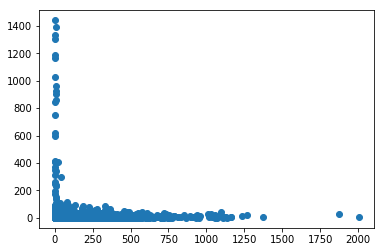

In [47]:
plt.scatter(user_s_d["TotalDetails"], user_s_d["TotalUTMClicks"])

In [58]:
user_s_d["TotalUTMClicks"].describe()

count    259500.000000
mean          1.277272
std           8.593804
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max        1440.000000
Name: TotalUTMClicks, dtype: float64

In [59]:
user_s_d["LaunchedButNotStarted"] = abs(user_s_d["LastStartedDayAgo"] - user_s_d["LastLaunchedDayAgo"])
user_s_d.head(10)

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LatestRegistrationStatus,Uninstalled,OS,Device,LastLaunchedDayAgo,LaunchedButNotStarted
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333,8.0,Completed,0.0,2,2,0.0,0.0
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000,29.0,Completed,0.0,1,1,4.0,0.0
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333,7.0,Completed,0.0,2,1,3.0,1.0
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000,20.0,Unknown,0.0,2,1,5.0,33.0
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667,15.0,Completed,0.0,2,1,4.0,3.0
5,2fa8ac132b7a74658f38919ba18dceb7,1161.0,534.0,40,48.0,53.400000,5.0,Completed,0.0,2,1,46.0,2.0
6,6bf7c866affbf98d03b1ef0c5d610ca7,1159.0,714.0,40,40.0,35.900000,9.0,Completed,1.0,2,1,4.0,36.0
7,dfb620972b18d528cc53cb440569a6d4,1136.0,685.0,1,1.0,43.600000,3.0,Unknown,0.0,1,1,0.0,1.0
8,5f478c77d22169cf0ea10d78966606df,1130.0,485.0,1,8.0,9.358333,4.0,Unknown,0.0,2,2,8.0,0.0
9,acedb1739911811ae2323c132b7f800c,1118.0,171.0,1,2.0,3.441667,7.0,Unknown,0.0,2,1,2.0,0.0


Text(0,0.5,'Number of Users')

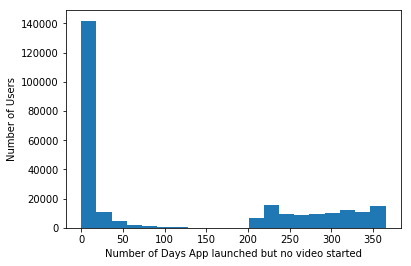

In [60]:
plt.hist(user_s_d["LaunchedButNotStarted"], bins = 20)
plt.xlabel("Number of Days App launched but no video started")
plt.ylabel("Number of Users")

In [61]:
user_s_d["LaunchedButNotStarted"].describe()

count    259500.000000
mean        113.132825
std         140.050697
min           0.000000
25%           0.000000
50%           9.000000
75%         258.000000
max         365.000000
Name: LaunchedButNotStarted, dtype: float64

In [62]:
user_s_d = user_s_d.drop("LaunchedButNotStarted",1)

In [63]:
user_s_d.head()

,UserId,TotalDetails,TotalStarted,Country,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LatestRegistrationStatus,Uninstalled,OS,Device,LastLaunchedDayAgo
0,0ceda9d5fc9679bab96b91b7a7380c13,2006.0,1088.0,40,0.0,48.733333,8.0,Completed,0.0,2,2,0.0
1,c0c01bf234c84f928218ca89f860f183,1876.0,573.0,40,4.0,28.950000,29.0,Completed,0.0,1,1,4.0
2,16c660a8b759200cb871879d044ce3dd,1374.0,933.0,40,4.0,33.933333,7.0,Completed,0.0,2,1,3.0
3,2a32428a7e58778f6d0e2d5747e63415,1270.0,661.0,40,38.0,63.350000,20.0,Unknown,0.0,2,1,5.0
4,51fe655e1c4ca4472c2b64c1e5c65e95,1234.0,195.0,40,7.0,7.166667,15.0,Completed,0.0,2,1,4.0


In [64]:
user_s_d["Country"] = user_s_d["Country"].astype('O')
user_s_d["OS"] = user_s_d["OS"].astype('O')
user_s_d["Device"] = user_s_d["Device"].astype('O')

In [65]:
user_s_d_num = user_s_d.select_dtypes(include=np.number)
user_s_d_cat = user_s_d.select_dtypes(exclude=np.number)

In [74]:
user_s_d_cat.columns

Index(['Country_1', 'Country_40', 'Country_255', 'Country_1000',
       'LatestRegistrationStatus_Completed',
       'LatestRegistrationStatus_Not Completed',
       'LatestRegistrationStatus_Unknown', 'OS_0', 'OS_1', 'OS_2', 'Device_0',
       'Device_1', 'Device_2', 'Device_3'],
      dtype='object')

In [66]:
user_s_d_cat = user_s_d_cat.drop("UserId",1)

In [67]:
user_s_d_cat = pd.get_dummies(user_s_d_cat)
user_s_d_cat.head()

,Country_1,Country_40,Country_255,Country_1000,LatestRegistrationStatus_Completed,LatestRegistrationStatus_Not Completed,LatestRegistrationStatus_Unknown,OS_0,OS_1,OS_2,Device_0,Device_1,Device_2,Device_3
0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,0,1,0,0,1,0,1,0,0
4,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [68]:
x_u = user_s_d_num["Uninstalled"]
user_s_d_num = user_s_d_num.drop("Uninstalled",1)
col = user_s_d_num.columns
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
user_s_d_num = sc.fit_transform(user_s_d_num)
user_s_d_num = pd.DataFrame(user_s_d_num, columns=col)

In [69]:
user_s_d_comb = pd.concat([user_s_d_num, x_u, user_s_d_cat], 1)

In [70]:
user_s_d_comb.head()

,TotalDetails,TotalStarted,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LastLaunchedDayAgo,Uninstalled,Country_1,Country_40,Country_255,...,LatestRegistrationStatus_Completed,LatestRegistrationStatus_Not Completed,LatestRegistrationStatus_Unknown,OS_0,OS_1,OS_2,Device_0,Device_1,Device_2,Device_3
0,53.556409,52.361867,-1.125982,15.973845,0.782278,-1.244509,0.0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,50.061400,27.422707,-1.099951,9.349501,3.225903,-1.161403,0.0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,36.565291,44.855907,-1.099951,11.018144,0.665915,-1.182179,0.0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
3,33.769285,31.684156,-0.878684,20.868157,2.178635,-1.140626,0.0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
4,32.801436,9.117848,-1.080427,2.055469,1.596820,-1.161403,0.0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [71]:
user_s_d.columns

Index(['UserId', 'TotalDetails', 'TotalStarted', 'Country',
       'LastStartedDayAgo', 'MonthlyStartedFreq', 'TotalUTMClicks',
       'LatestRegistrationStatus', 'Uninstalled', 'OS', 'Device',
       'LastLaunchedDayAgo'],
      dtype='object')

In [72]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [81]:
df_clus = user_s_d_comb[user_s_d_comb["Uninstalled"]==0]

In [82]:
df_clus = df_clus.drop(["Uninstalled", "LatestRegistrationStatus_Completed" , "LatestRegistrationStatus_Not Completed", "LatestRegistrationStatus_Unknown", "OS_0","OS_1","OS_2","Device_0","Device_1","Device_2","Device_3"],1)
#df_clus = df_clus.drop(["Uninstalled"],1)

In [83]:
df_clus.head()

,TotalDetails,TotalStarted,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LastLaunchedDayAgo,Country_1,Country_40,Country_255,Country_1000
0,53.556409,52.361867,-1.125982,15.973845,0.782278,-1.244509,0,1,0,0
1,50.061400,27.422707,-1.099951,9.349501,3.225903,-1.161403,0,1,0,0
2,36.565291,44.855907,-1.099951,11.018144,0.665915,-1.182179,0,1,0,0
3,33.769285,31.684156,-0.878684,20.868157,2.178635,-1.140626,0,1,0,0
4,32.801436,9.117848,-1.080427,2.055469,1.596820,-1.161403,0,1,0,0


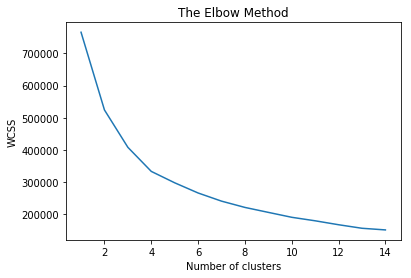

In [84]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_clus)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
kmeans.fit(df_clus)
y_clus = kmeans.predict(df_clus)

In [86]:
y_clus = pd.DataFrame(y_clus, columns=["Cluster"])
y_clus.shape

(89023, 1)

In [87]:
y_clus.isnull().sum()

Cluster    0
dtype: int64

In [88]:
user_x = user_s_d[user_s_d["Uninstalled"]==0]
user_x.shape

(89023, 12)

In [89]:
user_x.reset_index(drop=True, inplace=True)
y_clus.reset_index(drop=True, inplace=True)

In [90]:
final = pd.concat([user_x,y_clus], axis =1)

In [91]:
final.isnull().sum()

UserId                      0
TotalDetails                0
TotalStarted                0
Country                     0
LastStartedDayAgo           0
MonthlyStartedFreq          0
TotalUTMClicks              0
LatestRegistrationStatus    0
Uninstalled                 0
OS                          0
Device                      0
LastLaunchedDayAgo          0
Cluster                     0
dtype: int64

In [92]:
final.shape

(89023, 13)

In [93]:
final[final["Cluster"]==0].describe()

,TotalDetails,TotalStarted,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,Uninstalled,LastLaunchedDayAgo,Cluster
count,44100.000000,44100.000000,44100.000000,44100.000000,44100.000000,44100.0,44100.000000,44100.0
mean,16.121973,8.608118,30.562948,1.611096,1.507868,0.0,18.416304,0.0
std,20.154686,9.371210,30.850651,1.708240,2.932355,0.0,21.582341,0.0
min,0.000000,1.000000,0.000000,0.050000,0.000000,0.0,0.000000,0.0
25%,3.000000,2.000000,6.000000,0.400000,0.000000,0.0,2.000000,0.0
50%,8.000000,5.000000,20.000000,0.900000,1.000000,0.0,9.000000,0.0
75%,22.000000,12.000000,47.000000,2.250000,2.000000,0.0,29.000000,0.0
max,170.000000,95.000000,155.000000,10.800000,352.000000,0.0,127.000000,0.0


In [94]:
final[final["Cluster"]==1].describe()

,TotalDetails,TotalStarted,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,Uninstalled,LastLaunchedDayAgo,Cluster
count,8258.000000,8258.000000,8258.000000,8258.000000,8258.000000,8258.0,8258.000000,8258.0
mean,111.331799,55.107653,12.615888,9.318283,3.694720,0.0,7.265924,1.0
std,76.126100,30.800859,20.408347,5.516657,11.600008,0.0,16.090937,0.0
min,0.000000,8.000000,0.000000,0.225000,0.000000,0.0,0.000000,1.0
25%,62.000000,34.000000,1.000000,5.400000,1.000000,0.0,0.000000,1.0
50%,102.000000,47.000000,6.000000,8.200000,2.000000,0.0,2.000000,1.0
75%,148.000000,68.000000,14.000000,12.000000,4.000000,0.0,7.000000,1.0
max,622.000000,254.000000,149.000000,40.800000,904.000000,0.0,143.000000,1.0


In [95]:
final[final["Cluster"]==2].describe()

,TotalDetails,TotalStarted,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,Uninstalled,LastLaunchedDayAgo,Cluster
count,36115.000000,36115.000000,36115.000000,36115.000000,36115.000000,36115.0,36115.000000,36115.0
mean,4.538585,1.000332,312.448096,0.050366,0.711616,0.0,78.502146,2.0
std,7.803023,3.199198,100.031148,0.150808,1.889624,0.0,48.153025,0.0
min,0.000000,0.000000,79.000000,0.000000,0.000000,0.0,0.000000,2.0
25%,1.000000,0.000000,365.000000,0.000000,0.000000,0.0,31.000000,2.0
50%,2.000000,0.000000,365.000000,0.000000,0.000000,0.0,90.000000,2.0
75%,5.000000,0.000000,365.000000,0.000000,1.000000,0.0,118.000000,2.0
max,159.000000,55.000000,365.000000,2.750000,265.000000,0.0,365.000000,2.0


In [96]:
final[final["Cluster"]==3].describe()

,TotalDetails,TotalStarted,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,Uninstalled,LastLaunchedDayAgo,Cluster
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.0,550.000000,550.0
mean,309.600000,246.525455,7.949091,30.047011,7.132727,0.0,4.785455,3.0
std,281.417353,165.043854,15.073383,20.375549,10.340057,0.0,12.745275,0.0
min,0.000000,45.000000,0.000000,2.633333,0.000000,0.0,0.000000,3.0
25%,52.000000,152.000000,0.000000,17.500000,2.000000,0.0,0.000000,3.0
50%,284.500000,195.000000,1.000000,25.775000,4.000000,0.0,0.000000,3.0
75%,452.000000,283.750000,9.000000,37.150000,9.000000,0.0,3.000000,3.0
max,2006.000000,1375.000000,116.000000,185.150000,119.000000,0.0,116.000000,3.0


In [98]:
df_s_test = df_s[df_s["Date"]>pd.to_datetime("2017-06-10")]

In [99]:
y_test = df_s_test[["UserId","Country"]].groupby("UserId").nunique()
y_test = y_test.drop("UserId",1)
y_test = y_test.reset_index()
y_test.columns = ["UserId", "y_true"]
y_test.head()

,UserId,y_true
0,000076c7bbdf7e4568777134cc4bec56,1
1,00141a2f5b00bcd431614f1addf6ae07,1
2,0018050e2f3a7972d2180ed302636ebf,1
3,001a502f58c4550773ff63f019561009,1
4,0026732b396681fae630ab7f24bc6ed3,1


In [100]:
y_test.shape

(9350, 2)

In [101]:
X_y = pd.concat([user_s_d["UserId"], user_s_d_comb],1)
X_y = pd.merge(X_y, y_test, on = "UserId", how = "left")
X_y.head()

,UserId,TotalDetails,TotalStarted,LastStartedDayAgo,MonthlyStartedFreq,TotalUTMClicks,LastLaunchedDayAgo,Uninstalled,Country_1,Country_40,...,LatestRegistrationStatus_Not Completed,LatestRegistrationStatus_Unknown,OS_0,OS_1,OS_2,Device_0,Device_1,Device_2,Device_3,y_true
0,0ceda9d5fc9679bab96b91b7a7380c13,53.556409,52.361867,-1.125982,15.973845,0.782278,-1.244509,0.0,0,1,...,0,0,0,0,1,0,0,1,0,1.0
1,c0c01bf234c84f928218ca89f860f183,50.061400,27.422707,-1.099951,9.349501,3.225903,-1.161403,0.0,0,1,...,0,0,0,1,0,0,1,0,0,NaN
2,16c660a8b759200cb871879d044ce3dd,36.565291,44.855907,-1.099951,11.018144,0.665915,-1.182179,0.0,0,1,...,0,0,0,0,1,0,1,0,0,NaN
3,2a32428a7e58778f6d0e2d5747e63415,33.769285,31.684156,-0.878684,20.868157,2.178635,-1.140626,0.0,0,1,...,0,1,0,0,1,0,1,0,0,NaN
4,51fe655e1c4ca4472c2b64c1e5c65e95,32.801436,9.117848,-1.080427,2.055469,1.596820,-1.161403,0.0,0,1,...,0,0,0,0,1,0,1,0,0,1.0


In [102]:
X_y["y_true"] = X_y["y_true"].fillna(0)
X_y["y_true"].value_counts()

0.0    253387
1.0      6113
Name: y_true, dtype: int64

In [103]:
X_y_un = X_y[X_y["Uninstalled"]==0]
X_y_un["y_true"].value_counts()

0.0    83137
1.0     5886
Name: y_true, dtype: int64

In [115]:
x = pd.merge(final[["UserId","Cluster"]],X_y_un[["UserId","y_true"]], on= "UserId", how = "left")

In [116]:
x.isnull().sum()

UserId     0
Cluster    0
y_true     0
dtype: int64

In [117]:
clus = {0:"Not Likely",1:"Very Likely",2:"Less Likely", 3:"Moderately Likely"}
x["Clus"] = x["Cluster"].map(clus)

In [118]:
mat = pd.crosstab(x["Clus"], x["y_true"])

In [119]:
mat.columns = ["Not Watched", "Watched"]

In [120]:
mat["% watched"] = mat["Watched"]*100/(mat["Watched"]+mat["Not Watched"])
mat

,Not Watched,Watched,% watched
Clus,,,
Less Likely,35963,152,0.420878
Moderately Likely,308,242,44.000000
Not Likely,40529,3571,8.097506
Very Likely,6337,1921,23.262291


In [152]:
user_s_d["Uninstalled"].value_counts()

1.0    170477
0.0     89023
Name: Uninstalled, dtype: int64

In [98]:
X_y_tot = pd.concat([X_y_un[X_y_un["y_true"]==0][:6000], X_y_un[X_y_un["y_true"]==1]],0)

In [99]:
X = X_y_tot.drop("y_true",1)
y = X_y_tot["y_true"]

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [106]:
from sklearn.ensemble import RandomForestClassifier

ImportError: cannot import name 'MultiOutputMixin' from 'sklearn.base' (C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\base.py)

In [121]:
X = X_y_un.drop(["UserId", "y_true"],1)
x_col = X.columns

In [122]:
y = X_y_un["y_true"]

In [125]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(ratio={1: 5886, 0: 6000})
X_rs, y_rs = sampler.fit_sample(X,y)

ImportError: cannot import name 'MultiOutputMixin' from 'sklearn.base' (C:\Users\ABHINI\Anaconda3\lib\site-packages\sklearn\base.py)